In [10]:
!pip install pypyodbc

In [11]:
import pandas as pd
import pypyodbc

In [12]:
#Connects with database
conn = pypyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-DPKAQ8GL;'
                      'Database=project;'
                      'Trusted_Connection=yes;')

In [16]:
#gets and format the cases
sql_query = "select provinceName,  CONCAT(DATEPART(YEAR ,date_report), '_' ,DATEPART(Quarter ,date_report)) as 'YrQtr', sum(cases) as 'Total Cases' \
            FROM PROVINCES P JOIN CASES C \
            on p.provinceCode = c.provinceCode \
            WHERE provinceName = 'ONTARIO' \
            GROUP BY provinceName, CONCAT(DATEPART(YEAR ,date_report), '_' ,DATEPART(Quarter ,date_report))"

In [17]:
#generates the table
df = pd.read_sql(sql_query, conn)
df

,provincename,yrqtr,total cases
0,Ontario,2020_1,1964
1,Ontario,2020_2,34849
2,Ontario,2020_3,17064
3,Ontario,2020_4,132346
4,Ontario,2021_1,169541
5,Ontario,2021_2,195446
6,Ontario,2021_3,41542
7,Ontario,2021_4,180435
8,Ontario,2022_1,403915
9,Ontario,2022_2,12030


<AxesSubplot:title={'center':'Total Cases By Quarter Within Year - Ontario'}, xlabel='YrQtr'>

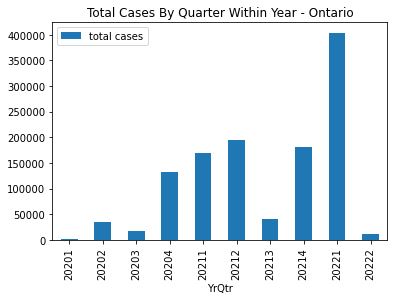

In [15]:
#creates the graph
df.plot(kind="bar",x="yrqtr", y="total cases" ,xlabel="YrQtr", title="Total Cases By Quarter Within Year - Ontario")